# Airline On-Time Statistics and Delay Causes
## by (Yasmine Hussein)

## Preliminary Wrangling

> The U.S. Department of Transportation issued a final rule on reporting the causes of flight delays on November 25, 2002. The final rule followed two years of consideration.

>DOT formed an Air Carrier On-Time Reporting Advisory Committee in August 2000 to consider changes to the current on-time reporting system so that the public would have clear information about the nature and sources of airline delays and cancellations. This task force recommended the creation of a reporting framework for collecting information about the causes of airline delays and cancellations.

>In 2001, BTS conducted a pilot program with four airlines to test the monthly reporting of causation. BTS based the final rule on the recommendations of the task force, the results of its pilot project, its outreach efforts to the aviation community and comments received after a proposed rule was published in December 2001.

>A flight is considered delayed when it arrived 15 or more minutes than the schedule (see definitions in Frequently Asked Questions). Delayed minutes are calculated for delayed flights only.
When multiple causes are assigned to one delayed flight, each cause is prorated based on delayed minutes it is responsible for. The displayed numbers are rounded and may not add up to the total.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# loading the dataset
df = pd.read_csv('airline_delay_causes.csv')
print(df.describe())
print(df.info())
df

               year         month   arr_flights     arr_del15    carrier_ct  \
count  41373.000000  41373.000000  41268.000000  41093.000000  41268.000000   
mean    2019.531627      6.217557    302.215252     45.169129     13.516774   
std        0.569917      3.574739    874.927770    139.054171     36.072013   
min     2019.000000      1.000000      1.000000      0.000000      0.000000   
25%     2019.000000      3.000000     34.000000      4.000000      1.000000   
50%     2019.000000      6.000000     82.000000     11.000000      4.000000   
75%     2020.000000      9.000000    199.000000     30.000000     10.772500   
max     2021.000000     12.000000  21873.000000   3714.000000    966.330000   

         weather_ct        nas_ct   security_ct  late_aircraft_ct  \
count  41268.000000  41268.000000  41268.000000      41268.000000   
mean       1.638711     14.462094      0.105219         15.254839   
std        5.705007     53.445779      0.532847         52.138189   
min        0

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0,NaN
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0,NaN
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0,NaN
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0,NaN
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41368,2019,9,UA,United Air Lines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",338.0,55.0,20.95,0.39,...,18.97,1.0,1.0,3215.0,1349.0,37.0,561.0,0.0,1268.0,NaN
41369,2019,9,UA,United Air Lines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",684.0,96.0,19.74,4.58,...,57.27,10.0,0.0,6266.0,1229.0,272.0,456.0,0.0,4309.0,NaN
41370,2019,9,UA,United Air Lines Inc.,BDL,"Hartford, CT: Bradley International",170.0,17.0,4.35,1.03,...,5.96,2.0,0.0,656.0,157.0,107.0,195.0,0.0,197.0,NaN
41371,2019,9,UA,United Air Lines Inc.,BGR,"Bangor, ME: Bangor International",4.0,1.0,0.00,0.00,...,0.00,0.0,0.0,15.0,0.0,0.0,15.0,0.0,0.0,NaN


In [3]:
# drop unneccessary columns

df.drop(columns=['Unnamed: 21'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 41373 non-null  int64  
 1    month               41373 non-null  int64  
 2   carrier              41373 non-null  object 
 3   carrier_name         41373 non-null  object 
 4   airport              41373 non-null  object 
 5   airport_name         41373 non-null  object 
 6   arr_flights          41268 non-null  float64
 7   arr_del15            41093 non-null  float64
 8   carrier_ct           41268 non-null  float64
 9    weather_ct          41268 non-null  float64
 10  nas_ct               41268 non-null  float64
 11  security_ct          41268 non-null  float64
 12  late_aircraft_ct     41268 non-null  float64
 13  arr_cancelled        41268 non-null  float64
 14  arr_diverted         41268 non-null  float64
 15   arr_delay           41268 non-null 

In [4]:
# check for null values

df.isnull().sum()

year                     0
 month                   0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            105
arr_del15              280
carrier_ct             105
 weather_ct            105
nas_ct                 105
security_ct            105
late_aircraft_ct       105
arr_cancelled          105
arr_diverted           105
 arr_delay             105
 carrier_delay         105
weather_delay          105
nas_delay              105
security_delay         105
late_aircraft_delay    105
dtype: int64

In [5]:
# drop NAN values

df.dropna(inplace= True)

# check again
df.isnull().sum()

year                   0
 month                 0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
 weather_ct            0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
 arr_delay             0
 carrier_delay         0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [6]:
# fixing columns names
print(df.columns)


Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [7]:
df.rename(columns={' month': 'month', ' weather_ct':'weather_ct', 
       ' arr_delay': 'arr_delay', ' carrier_delay': 'carrier_delay'}, inplace=True)

In [8]:
#modifying month column

df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [9]:
#adding city column
df['city'] = df['airport_name'].str.split(',').str[-1].str.split(':').str[0]

### What is the structure of your dataset?

> The dataset has 6087 observation and 22 variable
  This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2019 to 2021.

### What is/are the main feature(s) of interest in your dataset?

>  arr_delay  
   arr_del15
   carrier_delay         
   airport
   carrier 
   
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  weather_delay          
   nas_delay              
   security_delay         
   late_aircraft_delay 

## Univariate Exploration

### The distribution of carriers.

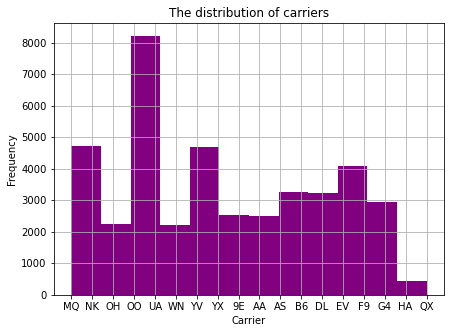

In [10]:
#plotting frequency of carrier per flights
df.carrier.hist(color='purple', bins=12, figsize=(7,5));
plt.title("The distribution of carriers")
plt.xlabel('Carrier')
plt.ylabel('Frequency');

> As shown in the figure that the most carrier with most flights is: 
#### UA  -> United Air Lines Inc.
#### OO -> SkyWest Airlines Inc

### Monthly flights

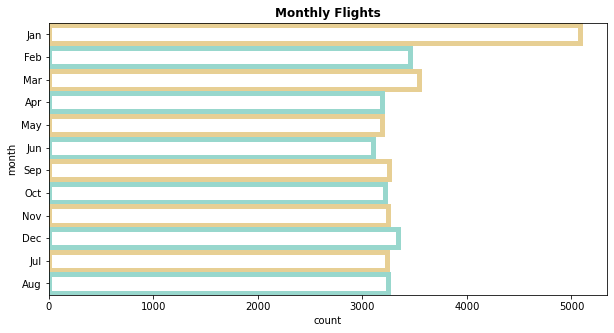

In [11]:
#plotting monthly flights
plt.figure(figsize = [10, 5])
g = sb.countplot(data=df, y='month', facecolor=(0, 0, 0, 0),
                   linewidth=5, 
                   edgecolor=sb.color_palette("BrBG", 2))
plt.title('Monthly Flights', fontsize=12, fontweight='bold');

>from graph we can see that almost all the months are equal in flights number except for Jan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was no need transformation for data also all variables that was tested is normal

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed soo operation to fix variable names to call it without errors, also I cleaned NAN values

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### On time flights per year

<Figure size 1080x360 with 0 Axes>

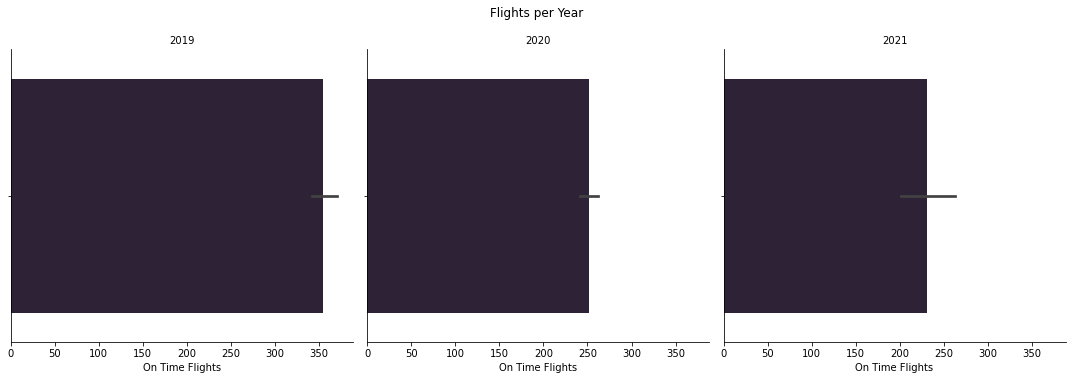

In [12]:
#plotting on time flights per year
plt.figure(figsize = [15, 5])
g = sb.catplot(data=df, x='arr_flights', col="year", kind='bar', sharey = False,
            color = sb.set_palette("mako"))
g.set_xlabels("On Time Flights")
g.set_titles("{col_name}")
g.fig.suptitle('Flights per Year', y=1.05);

As shown 2019 has the most flights that arrived on time and 2021 is the least!

### Delayed flights per year

<Figure size 1080x360 with 0 Axes>

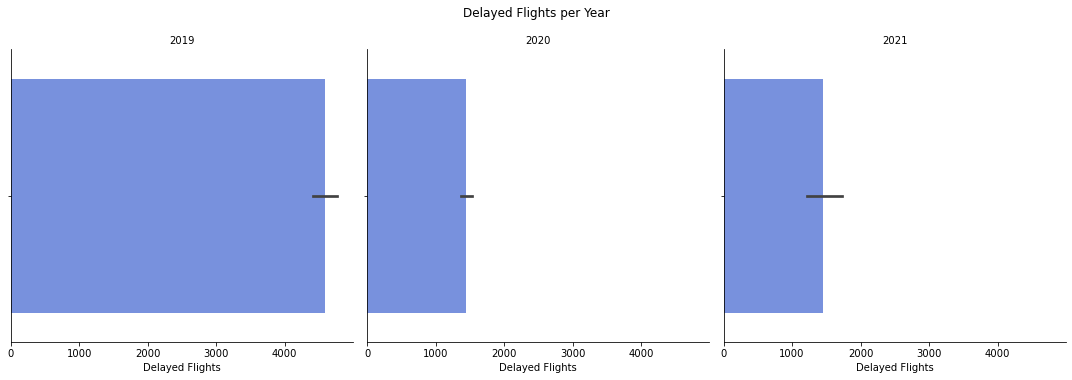

In [13]:
#plotting delayed flights per year
plt.figure(figsize = [15, 5])
g = sb.catplot(data=df, x='arr_delay', col="year", kind='bar',
            color = sb.set_palette("coolwarm"))
g.set_xlabels("Delayed Flights")
g.set_titles("{col_name}")
g.fig.suptitle('Delayed Flights per Year', y=1.05);

As shown 2019 has the most delayed flights as well!, and 2021 is the least!

### Cancelled flights per city

In [14]:
# plotting cancelled flights per city
df_gb = df[['city','arr_cancelled']].groupby('city').sum().reset_index()


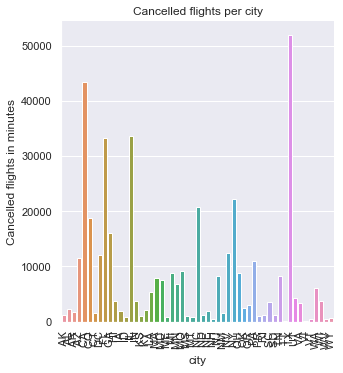

In [15]:
sb.set(rc={'figure.figsize':(10,20)})
sb.catplot(x='city', y='arr_cancelled', data=df_gb, kind='bar' )
plt.xticks(rotation=90)
plt.ylabel('Cancelled flights in minutes')
plt.title('Cancelled flights per city');
plt.show();

From fig, Texas has the most cancelled flights between all countries!

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> what I found really interested is that the year 2019 has the most on time flights as well as most delayed flights!!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> discovering that Texas has the most cancelled flights!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### correlation between cancelled and delayed variables

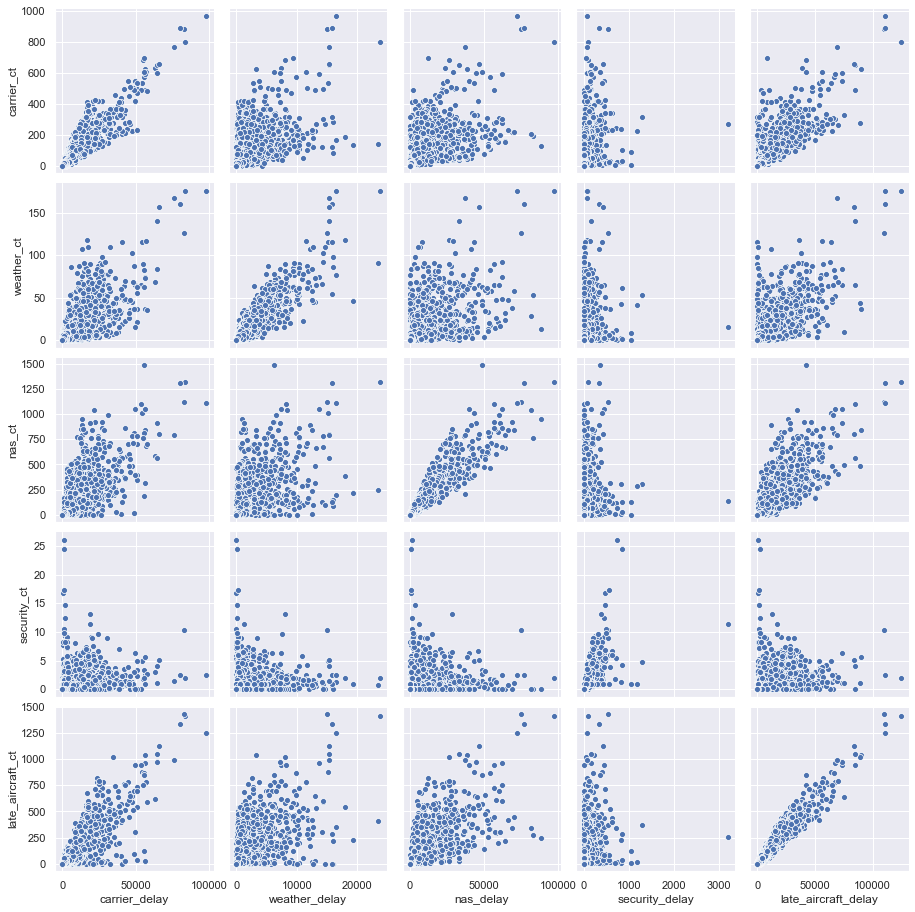

In [16]:
sb.pairplot(
    df,
    x_vars=['carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
    y_vars=['carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct']);

From graph we can spot positive correlation between:
carrier cancelled and carrier delay,
late aircraft cancelled and delay,
weather cancelled and delyed,
while security delay doesn't have impact on other variable


### plotting a heatmap between cancelled and delayed flights

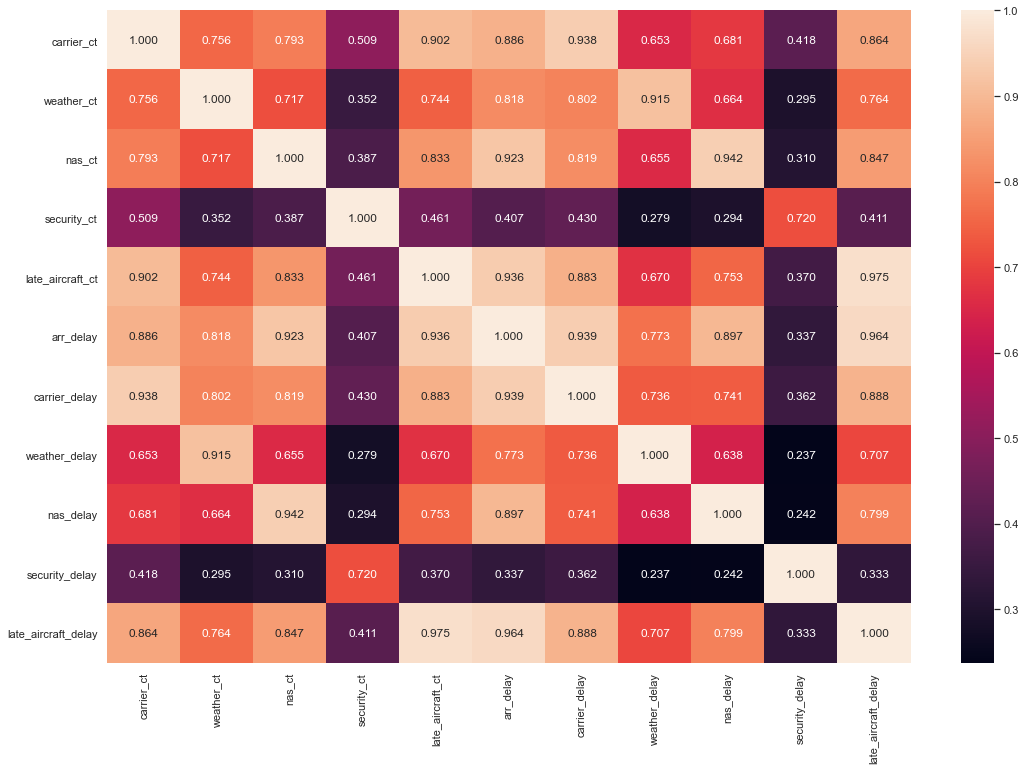

In [17]:
# find correlation between columns
# drop unneccessary columns
new_df = df.drop(['year','month','carrier','carrier_name','airport','airport_name','city','arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted'],axis=1)
new_df = new_df.corr()
plt.figure(figsize=(18,12))
sb.heatmap(new_df, annot=True, fmt = '.3f',color = sb.set_palette("mako"))
plt.show();

From graph we can notice that security delay and cancellation have the higher rate of time the other causes for delay or cancel.

### Finding correlation between delayed causes

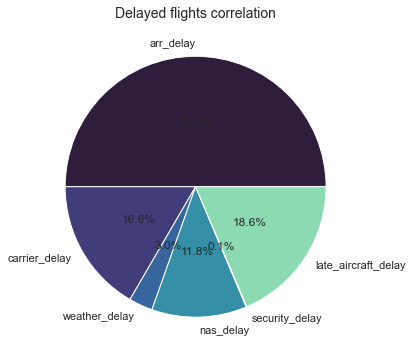

In [18]:
# subsetting delayed data and plotting it

data_dl= df[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data_dl.keys()
plt.pie(x=data_dl, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Delayed flights correlation", fontsize=14);

from fig we can tell that the delayed flights with no specific reason has 50 % of the data, while Security delay has only 0.1%

### Finding correlation between cancelled causes

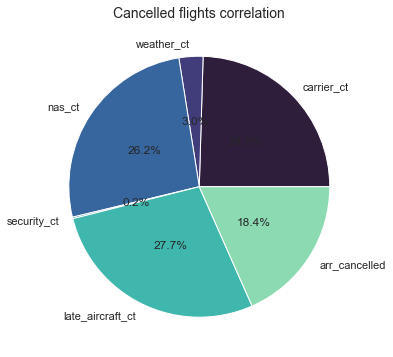

In [19]:
# subsetting cancelled data and plotting it

data_ct= df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled']].sum()
pie, ax = plt.subplots(figsize=[10,6])
labels = data_ct.keys()
plt.pie(x=data_ct, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Cancelled flights correlation", fontsize=14);

figure shows equally intervals for all kind of cancellation causes except for weather cancellation 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 
there are a positive correlation between most of cancelled and delayed variables except for security causes, also 50% of delayed flights has no specified cause for it

### Were there any interesting or surprising interactions between features?

> what was really excited to notice is that the security delay and cancellation has the highest number of mins, and it's the least frequent cause of delay or cancellation.